# Using deep features to build an image classifier

In [1]:
import pandas as pd
import numpy as np
import ast
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline

In [2]:
image_train = pd.read_csv('image_train_data.csv')
image_test = pd.read_csv('image_test_data.csv')
print(len(image_train))
print(len(image_test))
image_train.head()

2005
4000


,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...


## Train a classifier on the raw image pixels

We first start by training a classifier on just the raw pixels of the image.

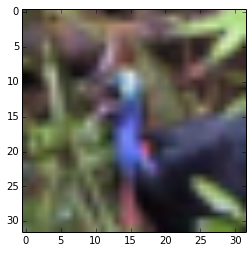

In [3]:
def str_to_arr(s, new_type=np.int_) : return np.array(s[1:-1].split(' ')).astype(new_type)

def to_img(lst) :
    it = iter(lst)
    pixels = list(zip(it, it, it))
    im = Image.new('RGBA', (32, 32))
    im.putdata(pixels)
    return im

bird_image_array = image_train.iloc[0]['image_array']
imshow(to_img(str_to_arr(bird_image_array)))

In [4]:
image_train['image_array_2'] = image_train['image_array'].apply(str_to_arr)
image_test['image_array_2'] = image_test['image_array'].apply(str_to_arr)

In [5]:
def vectorize(vecs) :
    arr = np.hstack(vecs)
    return arr.reshape((len(vecs), int(arr.size/len(vecs))))

In [6]:
X = vectorize(image_train['image_array_2'])
raw_pixel_model = linear_model.LogisticRegression(random_state=0)
raw_pixel_model.fit(X, image_train['label'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0)

In [7]:
image_test[0:3]['label']

0           cat
1    automobile
2           cat
Name: label, dtype: object

In [8]:
X_test = vectorize(image_test['image_array_2'])
raw_pixel_model.predict(X_test[0:3])

array(['dog', 'cat', 'dog'], dtype=object)

The model makes wrong predictions for all three images.

In [9]:
predictions = raw_pixel_model.predict(X_test)
metrics.accuracy_score(image_test['label'], predictions)

0.39624999999999999

## Given the deep features, let's train a classifier

In [10]:
image_train['deep_features_2'] = image_train['deep_features'].apply(str_to_arr, new_type=np.float_)
image_test['deep_features_2'] = image_test['deep_features'].apply(str_to_arr, new_type=np.float_)

In [11]:
X2 = vectorize(image_train['deep_features_2'])
deep_features_model = linear_model.LogisticRegression(random_state=0)
deep_features_model.fit(X2, image_train['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0)

In [12]:
X2_test = vectorize(image_test['deep_features_2'])
deep_features_model.predict(X2_test[0:3])

array(['cat', 'automobile', 'cat'], dtype=object)

In [13]:
predictions2 = deep_features_model.predict(X2_test)
metrics.accuracy_score(image_test['label'], predictions2)

0.79800000000000004